In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importer les données à partir de la bibliothèque seaborn ou pandas.
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Créer une fonction centrer qui centre les données.
def centrer(data):
    return data - data.mean()

In [4]:
# Tester la fonction sur le data
iris_centre = centrer(iris.drop(columns=['species']))
iris_centre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333


In [5]:
# Créer la fonction réduite qui retourne la matrice des données réduites.
def reduite(data):
    return data / data.std()

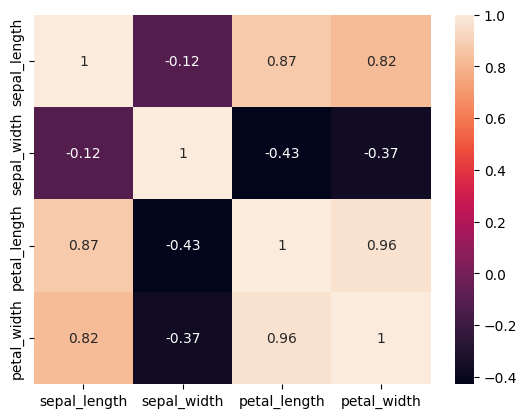

In [6]:
# Calculer et interpréter la matrice des corrélations. Quelles sont les variables les plus corrélées ?
corr_mat = iris_centre.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()


In [7]:
# Analyser les valeurs propres (np.linalg.eig). Quel est le pourcentage d'inertie expliquée par chaque axe ? 
# Combien d'axes peut-on conserver ?
cov_mat = np.cov(iris_centre.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
print('Valeurs propres :', eigenvalues)
print('\nPourcentage d\'inertie expliquée par chaque axe :', eigenvalues / sum(eigenvalues))
print('\nCumul du pourcentage d\'inertie expliquée :', np.cumsum(eigenvalues / sum(eigenvalues)))

Valeurs propres : [4.22824171 0.24267075 0.0782095  0.02383509]

Pourcentage d'inertie expliquée par chaque axe : [0.92461872 0.05306648 0.01710261 0.00521218]

Cumul du pourcentage d'inertie expliquée : [0.92461872 0.97768521 0.99478782 1.        ]


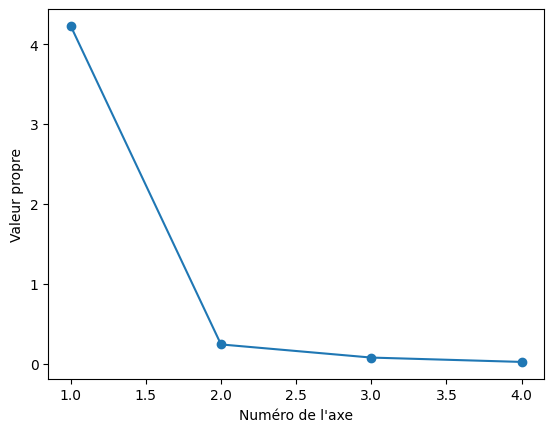

In [8]:
# Tracer les valeurs propres principaux et les interpréter.
plt.plot(range(1,5), eigenvalues, marker='o')
plt.xlabel('Numéro de l\'axe')
plt.ylabel('Valeur propre')
plt.show()